In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df=pd.read_csv("Titanic_dataset.csv")
df
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df=df.drop("Cabin",axis=1,inplace=True)
df

In [10]:
df.fillna(df.mean(),inplace=True)
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [8]:
df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [9]:
df.fillna("S",inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [11]:
df.corr()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.057527,-0.035322,0.083081,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.159651,0.216225,1.000000


In [12]:
df["FamilySize"]=df["SibSp"]+df["Parch"]
df.drop(["SibSp","Parch"],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,S,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

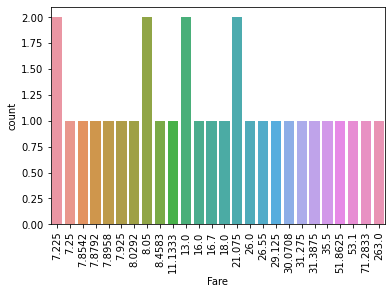

In [13]:
sb.countplot(data=df.head(30),x="Fare")
plt.xticks(rotation=90)

In [14]:
df.corr()

,PassengerId,Survived,Pclass,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.549500,0.065997
Fare,0.012658,0.257307,-0.549500,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,0.217138,1.000000


In [15]:
df["Sex"]=[0 if df["Sex"][i]=="male" else 1 for i in df.index]
df["Sex"]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,S,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",0,26,111369,30.0000,C,0


,Fare
Fare,1.0


In [9]:
df.groupby(["Sex"])["Fare"].mean()
##females were more in number as the average of fare is more for females

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [21]:
df["Alone"]=[0 if df['FamilySize'][i]>0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35,373450,8.0500,S,0,1


In [22]:
df[["Alone","Survived"]].corr()

,Alone,Survived
Alone,1.000000,-0.203367
Survived,-0.203367,1.000000


In [23]:
df.groupby(["Embarked"])["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [24]:
df.groupby(["Sex"])["Survived"].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [25]:
df[["Alone","Fare"]].corr()

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


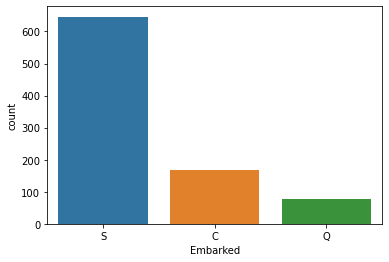

In [27]:
sb.countplot(data=df,x=df["Embarked"])

In [ ]:
##Conclusion
#1.correlation between fare and survived is positive which state that people who paid higher money has greater
#chance of survival than people who paid less and moderate for 2nd class people.

#2.by this chart, its clear that at starting the fare was constant from 7.25 to 8.0292 but after that it suddenly rises and then 
##at last it again gets constant, which shows that there is difference in the fair of all the three classes
##(high for 1st class , moderate for 2nd class and low for 3rd class)

##3.It is also evident that people of 3rd class is travelling more than other two class since we can see that frequency of 
##low fare is greater than other.

##4.size of the family is independent of sorvival rate and also to the class.

##5.we can see that age and survived are negatively correlated so aged people have less chance of survival whereas lower aged 
#people have higher chances of survival.

##6.we can see that if a person is alone, he does not have high chances of survival and vice-versa.

##7.people who boarded from Cherboug has high survival chances.

##8.among the people who survived , males are highest in number.

##9. people who are alone has to pay higher ticket fare than others.

##10.Males have higher age than females.

##11.Most of the people boarded the ship from Southhampton.
